## Data Description

Each  row  represents  a  customer,  each  column  contains  customer’s  attributes  described  on  the  column  Metadata.  The data set includes information about

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
# Basic imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


### Data understanding and exploration

In [2]:
churn_1 = pd.read_csv("data/telecom_churn1.csv")


In [3]:
churn_1.shape


(7043, 10)

In [4]:
churn_1.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
churn_1.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [6]:
churn_2 = pd.read_csv("data/telecom_churn2.csv")


In [7]:
churn_2.shape


(7043, 12)

In [8]:
churn_2.head()


,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
churn_2.columns


Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
churn = pd.merge(churn_1, churn_2, on="customerID")


In [11]:
churn.shape


(7043, 21)

In [12]:
churn.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# We will rename 'gender', 'tenure' and 'customerID' to Capitalized fashion since
# that convention is followed for other column names as well.
churn.rename(
    columns={"gender": "Gender", "tenure": "Tenure", "customerID": "CustomerID"},
    inplace=True,
)


In [15]:
churn.dtypes


CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
# Check for if any duplicates

any(churn.duplicated())


False

In [17]:
set(churn_1.columns).union(set(churn_2.columns)) == set(churn.columns)


False

**Observation** All columns are incorporated here.

### Data Cleaning

In [18]:
churn.isnull().sum()


CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
def print_unique_values(df, column_names=None):
    columns = df.columns
    if column_names:
        columns = column_names
    for column in columns:
        print(
            f"Column Name - {column}\nUnique values - {', '.join(map(str, df[column].unique()))}\n"
        )


In [20]:
# We will exclude the continuous ones and customerID to see unique values in other columns
print_unique_values(
    churn,
    [
        column
        for column in churn.columns
        if column not in ["MonthlyCharges", "TotalCharges", "CustomerID"]
    ],
)


Column Name - Gender
Unique values - Female, Male

Column Name - SeniorCitizen
Unique values - 0, 1

Column Name - Partner
Unique values - Yes, No

Column Name - Dependents
Unique values - No, Yes

Column Name - Tenure
Unique values - 1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5, 46, 11, 70, 63, 43, 15, 60, 18, 66, 9, 3, 31, 50, 64, 56, 7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 6, 4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 0, 39

Column Name - PhoneService
Unique values - No, Yes

Column Name - MultipleLines
Unique values - No phone service, No, Yes

Column Name - InternetService
Unique values - DSL, Fiber optic, No

Column Name - OnlineSecurity
Unique values - No, Yes, No internet service

Column Name - OnlineBackup
Unique values - Yes, No, No internet service

Column Name - DeviceProtection
Unique values - No, Yes, No internet service

Column Name - TechSupport
Unique values - No, Yes, No internet serv

**Observation**: From the above results we don't see any missing/unexpected values that need to be imputed

In [21]:
churn["MonthlyCharges"] = churn["MonthlyCharges"].astype(float)


In [22]:
try:
    churn["TotalCharges"] = churn["TotalCharges"].astype(float)
except ValueError as ex:
    print(f"Value error encoutered - {ex}")


Value error encoutered - could not convert string to float: ' '


In [23]:
len(churn[churn["TotalCharges"] == " "])


11

In [24]:
churn[churn["TotalCharges"] == " "]


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [25]:
# Check if the customer who have Tenure as zero are also the one who have TotalCharges empty
all(
    churn[churn["Tenure"] == 0]["CustomerID"]
    == churn[churn["TotalCharges"] == " "]["CustomerID"]
)


True

**Observation** It looks like from the above result the empty string values present in the _TotalCharges_ column are because the _tenure_ column is zero. The customer has not been charged yet. So it is safe to set those values to zero.

In [26]:
churn["TotalCharges"].replace(" ", 0, inplace=True)


/var/folders/63/j6w_zsv155n1r5q96vf1qrwc0000gn/T/ipykernel_69415/1719933302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn["TotalCharges"].replace(" ", 0, inplace=True)


In [27]:
churn.dtypes


CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [28]:
len(churn[churn["TotalCharges"] == 0])


11

In [29]:
churn["TotalCharges"] = churn["TotalCharges"].astype(float)


In [30]:
# customerID can be dropped since it's not going to help much with the model training
churn.drop("CustomerID", axis=1, inplace=True)


In [31]:
def display_pie_chart(df):
    cat_columns = df.select_dtypes(include=["category", "object"]).columns
    for column in cat_columns:
        counts = df[column].value_counts(normalize=True) * 100
        plt.pie(counts, autopct="%.2f")
        plt.title(column)
        plt.legend(loc="lower left", labels=counts.index, bbox_to_anchor=(1, 0, 0.5, 1))
        plt.show()


In [32]:
churn["Churn"].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

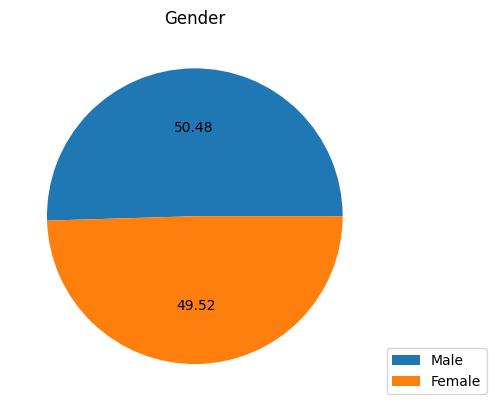

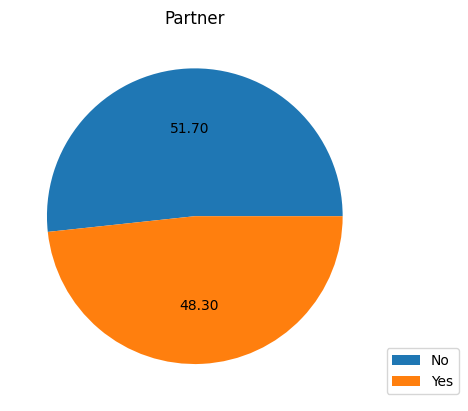

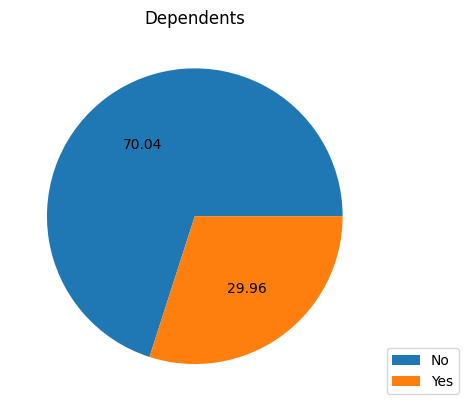

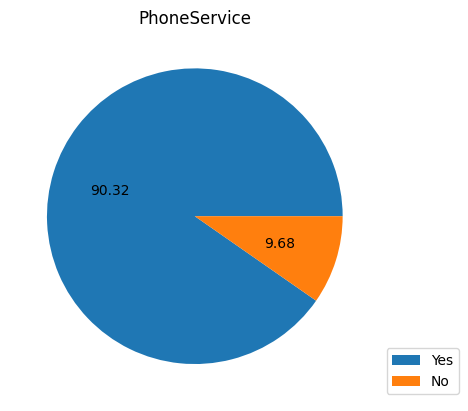

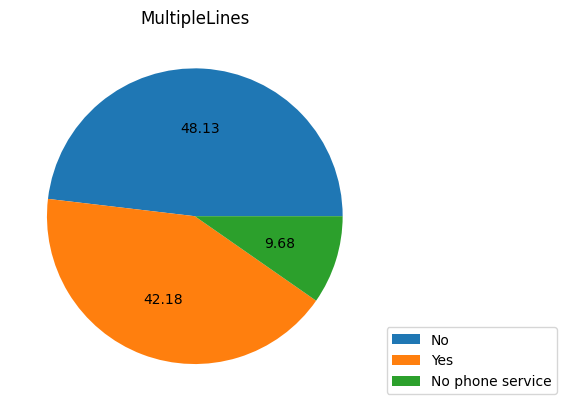

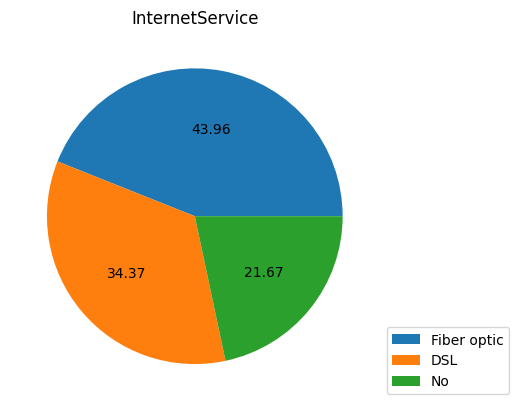

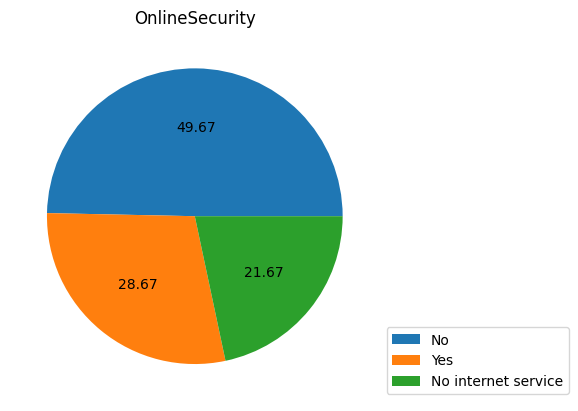

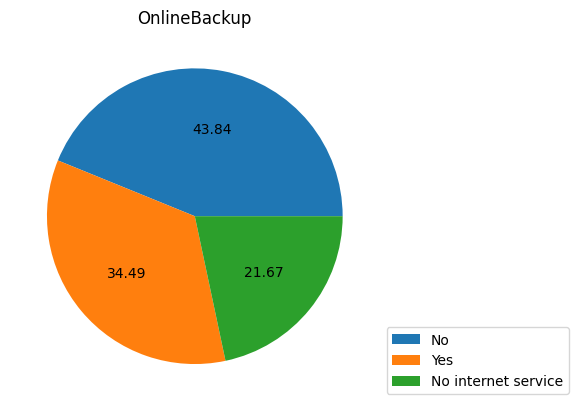

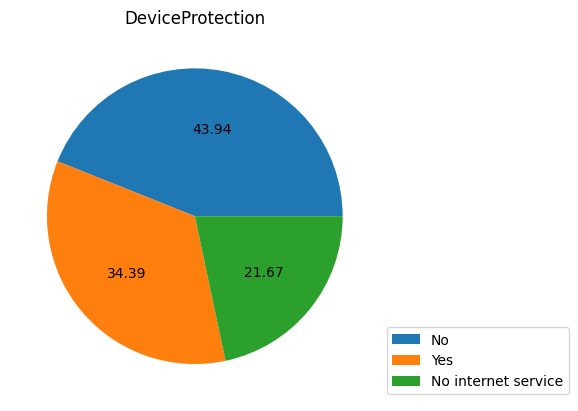

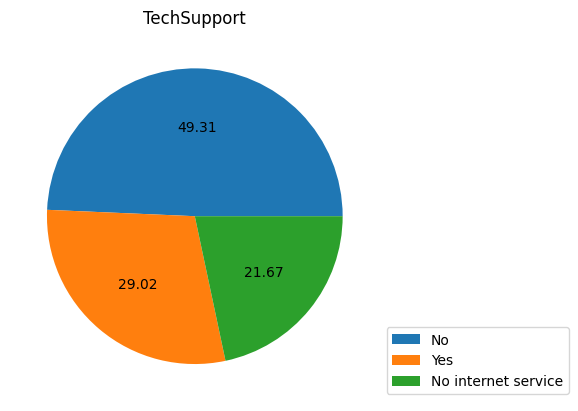

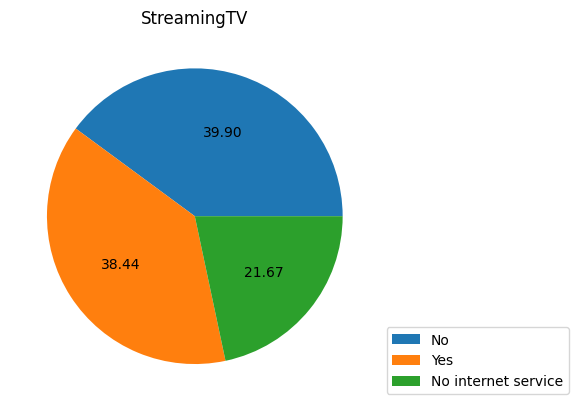

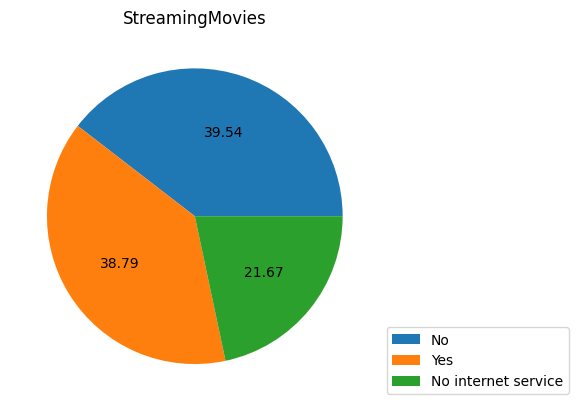

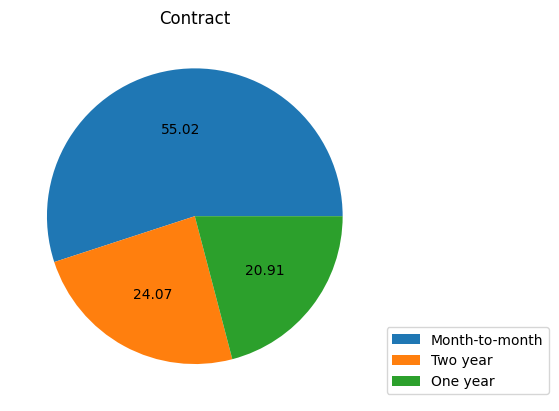

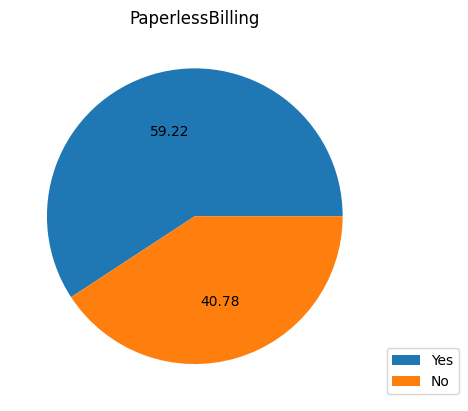

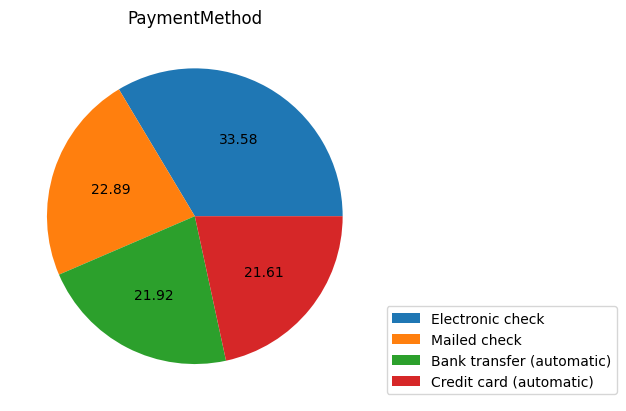

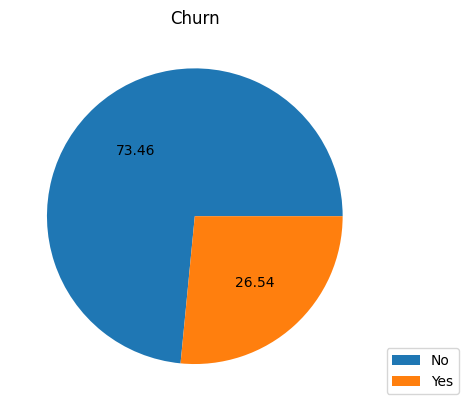

In [33]:
display_pie_chart(churn)


### Insights

- Some of the important observations from the plots are the Churn plot, where "No" percentage is 73%. It means that 73% of customers has not left in the last month.
- The distribution of payment methods is almost equal with Electronic Check being used the most.
- The contract is majorly on a Month-Month basis.
- 70% of the customers have no dependent and 44% of the customers have opted for fibre optic line. Only 10% of the customers have not opted for Phone service.

In [34]:
X = churn.drop("Churn", axis=1).copy()
y = churn["Churn"].copy()


In [35]:
print(f"Type(X) - {type(X)}, len - {len(X)}")
print(f"Type(y) - {type(y)}, len - {len(y)}")


Type(X) - <class 'pandas.core.frame.DataFrame'>, len - 7043
Type(y) - <class 'pandas.core.series.Series'>, len - 7043


In [36]:
# We can use the pd.get_dummies function to do One-Hot Encoding since using sklearn's OneHotEncoder will need additional concat operation.

# sample
pd.get_dummies(X, columns=["Gender"]).head()


,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,True,False
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False,True
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,False,True
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False,True
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True,False


In [37]:
X_encoded = pd.get_dummies(
    X, columns=X.select_dtypes(include=["category", "object"]).columns
)


In [38]:
X_encoded.shape


(7043, 45)

In [39]:
X_encoded.head()


,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [40]:
# 'No' is encoded as 0 and 'Yes' is encoded as 1.

y.replace(to_replace="Yes", value=1, inplace=True)
y.replace(to_replace="No", value=0, inplace=True)


/var/folders/63/j6w_zsv155n1r5q96vf1qrwc0000gn/T/ipykernel_69415/3594151907.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(to_replace="No", value=0, inplace=True)


In [41]:
y.unique()


array([0, 1])

In [42]:
# Tt is better to do normalization/scaling before train/test split
from sklearn.preprocessing import MinMaxScaler

# Shouldn't be transforming the entire dataset. Apply transformation on train and use it in test set.
scaler = MinMaxScaler(feature_range=(0, 1))
feature_names = X_encoded.columns.values
X_scaled = pd.DataFrame(scaler.fit(X_encoded).transform(X_encoded))
X_scaled.columns = feature_names


In [43]:
X_scaled.head()


,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [45]:
print(f"Percentage of people who left in train set - {sum(y_train)/len(y_train)}")
print(f"Percentage of people who left in test set - {sum(y_test)/len(y_test)}")


Percentage of people who left in train set - 0.2653532126375577
Percentage of people who left in test set - 0.2654364797728886


**Observation** The percentage values are almost equal

### Model building and Improvement

In [46]:
import xgboost as xgb

# From XGBoost Documentation
# When used with binary classification, the objective should
# be binary:logistic or similar functions that work on probability

base_model = xgb.XGBClassifier(objective="binary:logistic", seed=42)


In [47]:
base_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [48]:
base_model.score(X_train, y_train)


0.9357472488462903

In [49]:
base_model.score(X_test, y_test)


0.772888573456352

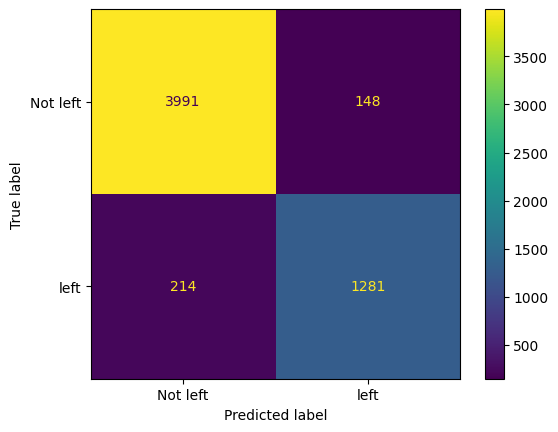

In [50]:
# Using ConfusionMatrixDisplay due to below reason
# plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2.
# Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

# For train data
cm = confusion_matrix(y_train, base_model.predict(X_train), labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not left", "left"])
disp.plot()


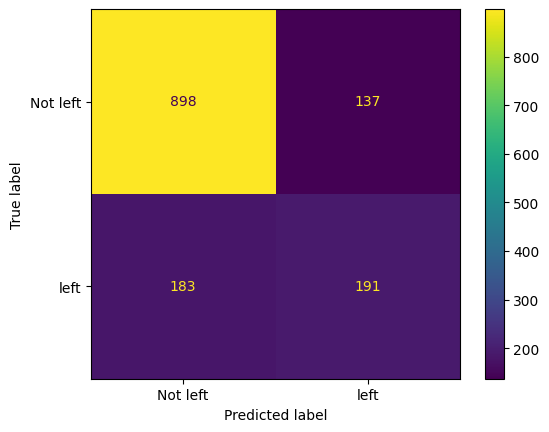

In [51]:
# For test data
cm = confusion_matrix(y_test, base_model.predict(X_test), labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not left", "left"])
disp.plot()


In [52]:
print(classification_report(y_train, base_model.predict(X_train)))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4139
           1       0.90      0.86      0.88      1495

    accuracy                           0.94      5634
   macro avg       0.92      0.91      0.92      5634
weighted avg       0.94      0.94      0.94      5634



In [53]:
print(classification_report(y_test, base_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.58      0.51      0.54       374

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.76      0.77      0.77      1409



We can use `RandomSearchCV` from `sklearn` to randomly try out various different combination of parameters rather than using nested `for loops`

Some of the parameters which we'll be looking at

- `max_depth` (default: 6) - Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit
- `learning_rate (aka eta)` (default: 0.3, range: [0, 1]) - Step size shrinkage used in update to prevents overfitting
- `gamma` (default: 0) - Minimum loss reduction required to make a further partition on a leaf node of the tree
- `reg_lambda` (default: 1) regularization term on weights. Increasing this value will make model more conservative
- `scale_pos_weight` (default: 1) Control the balance of positive and negative weights, useful for unbalanced classes. 

A typical value to consider: `sum(negative instances) / sum(positive instances)`

- `subsample` (default: 1, range: [0, 1])  Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting.

In [54]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "max_depth": [5, 6, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
}

model = xgb.XGBClassifier(objective="binary:logistic", seed=42)

random_search = RandomizedSearchCV(
    model, param_distributions=params, n_iter=10, n_jobs=4, random_state=42
)

random_search.fit(X_train, y_train)


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=No...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=4,
                   param_distributions={'gamma': [0, 0.25, 1],
                                        'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': [5, 6, 7],
                                        'reg_lambda': [0, 1, 10],
                                        'scale_pos_weight': [1, 3, 5],
                                        'subsample': [0.8]},
                   random_state=42)

In [55]:
print(random_search.best_params_)


{'subsample': 0.8, 'scale_pos_weight': 1, 'reg_lambda': 10, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.25}


In [56]:
test_model = xgb.XGBClassifier(
    objective="binary:logistic", seed=42, **random_search.best_params_
)

test_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [57]:
test_model.score(X_test, y_test)


0.8034066713981547

In [58]:
test_model.score(X_train, y_train)


0.8349307774227902

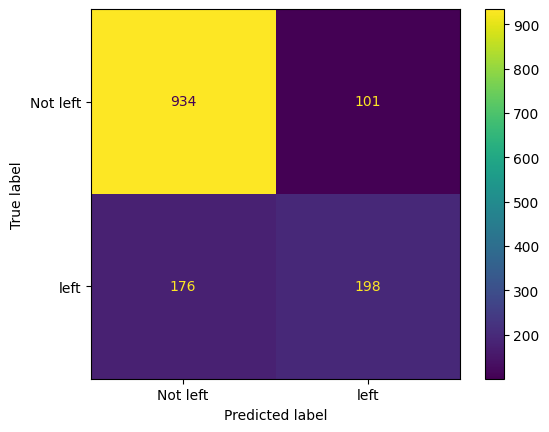

In [59]:
# For test data
cm = confusion_matrix(y_test, test_model.predict(X_test), labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not left", "left"])
disp.plot()


In [60]:
print(classification_report(y_test, test_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



**Observation** Post optimizing for best result it can be observed that we are able to more accurately identify customers who might leave compared to the baseline model. The model has also become generalized on the train/test data.

## ML Workflow

In [ ]:
# All required imports

# We'll use type hints for better auto completion and documentation of param types
import pickle
from pathlib import Path
from typing import Callable
from typing import List
from typing import Union

import pandas as pd

# Classifier imports
# Base class for classifier and regressor in scikit-learn
from sklearn.base import ClassifierMixin

# Regressor
from sklearn.base import RegressorMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.validation import check_is_fitted
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import XGBRFClassifier
from xgboost import XGBRFRegressor


In [62]:
def path_exists(file_path: Union[Path, str]):
    """
    Check if provided path exists
    Args:
        file_path: Path to file
    Returns:
        file_path: (Of type Path)
    Raises:
        FileNotFoundError
    """
    if isinstance(file_path, str):
        # Convert to Path type for easy handling
        file_path = Path(file_path)
    if isinstance(file_path, Path) and not file_path.exists():
        raise FileNotFoundError("File not found at the given path!")
    return file_path


In [63]:
class Classifiers:
    def __init__(
        self,
        random_state: int = 42,
        classifiers: List[ClassifierMixin] = None,
        pre_process: Callable = None,
        test_size: float = 0.2,
    ):
        """
        Args
            random_state: To be passed as input at model initialization
            classifiers: If None then default models will be used
            pre_process: Function with args (X, y) and return (X, y). Need to be passed for encoding/cleanup if any.
                         This will be called in self.fit(X, y) stage.
            test_size: Represent the proportion of the dataset to include in the test split
        Returns
            None
        """
        self.classifier_candidates = (
            [
                LogisticRegression,
                SVC,
                KNeighborsClassifier,
                DecisionTreeClassifier,
                RandomForestClassifier,
                XGBClassifier,
                XGBRFClassifier,
            ]
            if not classifiers
            else classifiers
        )
        self.random_state = random_state
        self.best_model = None
        self.results = None
        self.pre_process = pre_process
        self.test_size = test_size

    def fit(
        self,
        X: pd.DataFrame,
        y: Union[np.array, pd.Series],
    ):
        """
        Fit Classification algorithms to X_train and y_train
        Args:
            X: Set of features
            y: Target variable
        Returns
            self
        """
        result = []
        # Should raise error if any in pre-process stage
        if self.pre_process:
            X, y = self.pre_process(X, y)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state, stratify=y
        )
        for model in self.classifier_candidates:
            # model_obj = model(random_state=self.random_state)
            model_obj = model()
            print(f"Currently running fit for {model.__name__}")
            model_obj.fit(X_train, y_train)
            y_pred = model_obj.predict(X_test)
            roc_auc = None
            try:
                roc_auc = roc_auc_score(y_test, y_pred)
            except Exception as ex:
                print(f"ROC AUC couldn't be calculated for {model.__name__} - {ex}")
            result.append(
                {
                    "Model": model.__name__,
                    "ModelObj": model_obj,
                    "Accuracy": accuracy_score(y_test, y_pred, normalize=True),
                    "BalancedAccuracy": balanced_accuracy_score(y_test, y_pred),
                    "F1": f1_score(y_test, y_pred, average="weighted"),
                    "ROCAUC": roc_auc,
                }
            )
        self.results = sorted(result, key=lambda x: x["Accuracy"], reverse=True)
        self.best_model = self.results[0].get("ModelObj")
        return self

    def df(self) -> pd.DataFrame:
        """
        Returns DataFrame with best results
        """
        df = pd.DataFrame(self.results)
        df.drop(columns=["ModelObj"], axis=1, inplace=True)
        return df

    def __validate_metric(self, metric_name: str):
        allowed_metrics = ["Accuracy", "BalancedAccuracy", "F1", "ROCAUC"]
        if not metric_name in allowed_metrics:
            raise ValueError(
                f"metric_name need to be one of {' | '.join(allowed_metrics)}"
            )

    def save_best_model(self, metric: str = "Accuracy"):
        """
        Save the best model based on metric
        Args:
            metric: Metric name to be provided for choosing the best model
                Allowed values are ["Accuracy", "BalancedAccuracy", "F1", "ROCAUC"]
        Returns:
            None
        """
        self.__validate_metric(metric)
        best_result = sorted(self.results, key=lambda x: x[metric], reverse=True)[0]
        best_model_name = best_result["Model"]
        check_is_fitted(self.best_model)
        pickle.dump(self.best_model, open(f"best_model_{best_model_name}.pkl", "wb"))
        print(
            f"Saved {best_model_name} as the best model with {metric} of {best_result[metric]:.2f}"
        )


In [64]:
class Regressors:
    def __init__(
        self,
        random_state: int = 42,
        regressors: List[RegressorMixin] = None,
        pre_process: Callable = None,
        test_size: float = 0.2,
    ):
        """
        Args
            random_state: To be passed as input at model initialization
            regressors: If None then default models will be used
            pre_process: Function with args (X, y) and return (X, y). Need to be passed for encoding/cleanup if any.
                         This will be called in self.fit(X, y) stage.
            test_size: Represent the proportion of the dataset to include in the test split
        Returns
            None
        """
        self.regressor_candidates = (
            [
                LinearRegression,
                SVR,
                KNeighborsRegressor,
                DecisionTreeRegressor,
                RandomForestRegressor,
                XGBRegressor,
                XGBRFRegressor,
            ]
            if not regressors
            else regressors
        )
        self.random_state = random_state
        self.best_model = None
        self.results = None
        self.pre_process = pre_process
        self.test_size = test_size

    def fit(
        self,
        X: pd.DataFrame,
        y: Union[np.array, pd.Series],
    ):
        """
        Fit Regression algorithms to X_train and y_train
        Args:
            X: Set of features
            y: Target variable
        Returns
            self
        """
        result = []
        # Should raise error if any in pre-process stage
        if self.pre_process:
            X, y = self.pre_process(X, y)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )
        for model in self.regressor_candidates:
            # model_obj = model(random_state=self.random_state)
            model_obj = model()
            print(f"Currently running fit for {model.__name__}")
            model_obj.fit(X_train, y_train)
            y_pred = model_obj.predict(X_test)
            result.append(
                {
                    "Model": model.__name__,
                    "ModelObj": model_obj,
                    "RMSE": self.rmse(y_test, y_pred),
                    "R_SQUARED": r2_score(y_test, y_pred),
                }
            )
        self.results = sorted(result, key=lambda x: x["RMSE"], reverse=False)
        self.best_model = self.results[0].get("ModelObj")
        return self

    def rmse(
        self, y_test: Union[np.array, pd.Series], y_pred: Union[np.array, pd.Series]
    ):
        return np.sqrt(mean_squared_error(y_test, y_pred))

    def df(self) -> pd.DataFrame:
        """
        Returns DataFrame with best results
        """
        df = pd.DataFrame(self.results)
        df.drop(columns=["ModelObj"], axis=1, inplace=True)
        return df

    def __validate_metric(self, metric_name: str):
        if not metric_name in ["RMSE", "R_SQUARED"]:
            raise ValueError("metric_name need to be one of RMSE | R_SQUARED")

    def save_best_model(self, metric: str = "RMSE"):
        """
        Save the best model based on metric
        Args:
            metric: Metric name to be provided for choosing the best model
                Allowed values are ["RMSE", "R_SQUARED"]
        Returns:
            None
        """
        self.__validate_metric(metric)
        metric_map = {"RMSE": False, "R_SQUARED": True}
        # Low RMSE is good and High R_SQUARED is good
        # Need to handled sorted reverse accordingly
        best_result = sorted(
            self.results, key=lambda x: x[metric], reverse=metric_map[metric]
        )[0]
        best_model_name = best_result["Model"]
        check_is_fitted(self.best_model)
        pickle.dump(self.best_model, open(f"best_model_{best_model_name}.pkl", "wb"))
        print(
            f"Saved {best_model_name} as the best model with {metric} of {best_result[metric]:.2f}"
        )


In [65]:
def pre_process_churn(X, y):
    """
    pre_process function specifically to be used with Churn data.
    To be passed as argument to Classifier.

    Any null value removal/imputing or encoding of categorical features
    has to be taken care in the pre_process stage
    """

    X = pd.get_dummies(
        X, columns=X.select_dtypes(include=["category", "object"]).columns
    )
    y.replace(to_replace="Yes", value=1, inplace=True)
    y.replace(to_replace="No", value=0, inplace=True)
    return X, y


In [66]:
churn.to_csv("data/churn_clean.csv")


In [67]:
def main(
    file_path: Union[Path, str],
    learning_type: str,
    target_label: str,
    pre_process: Callable = None,
):
    """
    Main function Workflow
    1. Read CSV file
    2. Initialize appropriate class
    3. Fit on train data based which generates a set of base line model with corresponding metrics
    4. Save the best model based on metric passed. (Default is taken in this case)
    Args:
        file_path: Path to CSV file
        learning_type: Regression or Classfication?
        target_label: Column name of DataFrame (y variable)
        pre_process: Pass function as argument. Pre processing if any like encoding/removing null values can be taken care here
    Returns:
        Regressors/Classifier type object
    """
    model = None
    supported_learning_types = ["regression", "classification"]
    if learning_type not in supported_learning_types:
        raise ValueError(
            "Only regression and classification is supported for learning type"
        )
    file_path = path_exists(file_path)
    df = pd.read_csv(file_path)
    if learning_type == "classification":
        model = Classifiers(random_state=42, pre_process=pre_process)
        model.fit(X=df.drop(target_label, axis=1), y=df[target_label])
        model.save_best_model()
    else:
        model = Regressors(random_state=42, pre_process=pre_process)
        model.fit(X=df.drop(target_label, axis=1), y=df[target_label])
        model.save_best_model()
    return model


In [68]:
clf = main(
    "data/churn_clean.csv",
    learning_type="classification",
    target_label="Churn",
    pre_process=pre_process_churn,
)


/var/folders/63/j6w_zsv155n1r5q96vf1qrwc0000gn/T/ipykernel_69415/3862867449.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(to_replace="No", value=0, inplace=True)
/Users/neelabalan/code/notebooks/sklearn-workbench/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Currently running fit for LogisticRegression
Currently running fit for SVC
Currently running fit for KNeighborsClassifier
Currently running fit for DecisionTreeClassifier
Currently running fit for RandomForestClassifier
Currently running fit for XGBClassifier
Currently running fit for XGBRFClassifier
Saved LogisticRegression as the best model with Accuracy of 0.80


In [69]:
clf.df()


,Model,Accuracy,BalancedAccuracy,F1,ROCAUC
0,LogisticRegression,0.801987,0.717509,0.795351,0.717509
1,XGBRFClassifier,0.793471,0.729642,0.792289,0.729642
2,RandomForestClassifier,0.792051,0.702207,0.784348,0.702207
3,XGBClassifier,0.780696,0.698747,0.775778,0.698747
4,SVC,0.734564,0.500000,0.622155,0.500000
5,DecisionTreeClassifier,0.734564,0.673323,0.737924,0.673323
6,KNeighborsClassifier,0.715401,0.573191,0.690498,0.573191


In [70]:
# Will try regression from sklearn dataset
# Before calling main we will create a CSV file to dump
from sklearn import datasets

diabetes_data = datasets.load_diabetes()
db_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
db_df["projection"] = diabetes_data.target

# Write to CSV
db_df.to_csv("data/diabetes.csv")


In [71]:
# No preprocessing required here
reg = main("data/diabetes.csv", learning_type="regression", target_label="projection")


Currently running fit for LinearRegression
Currently running fit for SVR
Currently running fit for KNeighborsRegressor
Currently running fit for DecisionTreeRegressor
Currently running fit for RandomForestRegressor
Currently running fit for XGBRegressor
Currently running fit for XGBRFRegressor
Saved XGBRFRegressor as the best model with RMSE of 53.85


In [72]:
reg.df()


,Model,RMSE,R_SQUARED
0,XGBRFRegressor,53.848402,0.452705
1,LinearRegression,53.851966,0.452633
2,RandomForestRegressor,55.135033,0.426239
3,XGBRegressor,56.737996,0.392392
4,DecisionTreeRegressor,68.673221,0.109876
5,SVR,72.703350,0.002336
6,KNeighborsRegressor,78.074105,-0.150508
